In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

### Generate random numbers for 2 variables, length: 20 for each one. Save them in two separated lists.

In [2]:
x_arr = np.array([5, 19, 17, 13, 19, 15, 15, 7, 8, 6, 13, 18, 11, 10, 5, 19, 9, 15, 12, 12])
y_arr = np.array([10, 23, 21, 19, 23, 21, 19, 13, 13, 10, 16, 19, 17, 11, 9, 23, 13, 19, 16, 12])

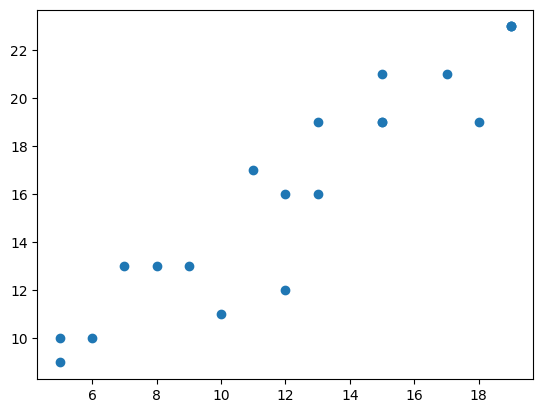

In [3]:
plt.scatter(x_arr, y_arr)

### Convert both lists/arrays into a dataframe.

In [4]:
dic = {"x": x_arr, "y": y_arr}

df = pd.DataFrame(dic)
df

,x,y
0,5,10
1,19,23
2,17,21
3,13,19
4,19,23
5,15,21
6,15,19
7,7,13
8,8,13
9,6,10


## 1) RESOLVER EL MODELO DE REGRESION LINEAL USANDO LA FORMULA DE LA ECUACION NORMAL (ALGEBRA ANALITICA)

### MANUAL CALCULATION

### Calculate average of your X variable.

In [5]:
avg_x = df["x"].mean()
avg_x

12.4

### Calculate the difference between each X and the average X.

In [6]:
df["Avg(x)-x"] = avg_x - df["x"]
df

,x,y,Avg(x)-x
0,5,10,7.4
1,19,23,-6.6
2,17,21,-4.6
3,13,19,-0.6
4,19,23,-6.6
5,15,21,-2.6
6,15,19,-2.6
7,7,13,5.4
8,8,13,4.4
9,6,10,6.4


### Square the differences and add it all up. This is SSxx.

In [7]:
df["(Avg(x)-x)^2"] = df["Avg(x)-x"] ** 2
df

,x,y,Avg(x)-x,(Avg(x)-x)^2
0,5,10,7.4,54.76
1,19,23,-6.6,43.56
2,17,21,-4.6,21.16
3,13,19,-0.6,0.36
4,19,23,-6.6,43.56
5,15,21,-2.6,6.76
6,15,19,-2.6,6.76
7,7,13,5.4,29.16
8,8,13,4.4,19.36
9,6,10,6.4,40.96


### Calculate average of your Y variable.

In [8]:
avg_y = df["y"].mean()
avg_y

16.35

### Multiply the differences (of X and Y from their respective averages) and add them all together.

In [9]:
df["Avg(y)-y"] = avg_y - df["y"]
df

,x,y,Avg(x)-x,(Avg(x)-x)^2,Avg(y)-y
0,5,10,7.4,54.76,6.35
1,19,23,-6.6,43.56,-6.65
2,17,21,-4.6,21.16,-4.65
3,13,19,-0.6,0.36,-2.65
4,19,23,-6.6,43.56,-6.65
5,15,21,-2.6,6.76,-4.65
6,15,19,-2.6,6.76,-2.65
7,7,13,5.4,29.16,3.35
8,8,13,4.4,19.36,3.35
9,6,10,6.4,40.96,6.35


### Multiply the differences (of X and Y from their respective averages) and add them all together. This is SSxy.

In [10]:
df["(Avg(x)-x)*(Avg(y)-y)"] = df["Avg(x)-x"] * df["Avg(y)-y"]
df

,x,y,Avg(x)-x,(Avg(x)-x)^2,Avg(y)-y,(Avg(x)-x)*(Avg(y)-y)
0,5,10,7.4,54.76,6.35,46.99
1,19,23,-6.6,43.56,-6.65,43.89
2,17,21,-4.6,21.16,-4.65,21.39
3,13,19,-0.6,0.36,-2.65,1.59
4,19,23,-6.6,43.56,-6.65,43.89
5,15,21,-2.6,6.76,-4.65,12.09
6,15,19,-2.6,6.76,-2.65,6.89
7,7,13,5.4,29.16,3.35,18.09
8,8,13,4.4,19.36,3.35,14.74
9,6,10,6.4,40.96,6.35,40.64


### Using SSxx and SSxy, you calculate the intercept by subtracting SSxx / SSxy * AVG(X) from AVG(Y).

In [11]:
sum_xx = df["(Avg(x)-x)^2"].sum()
sum_xx

422.8

In [12]:
sum_xy = df["(Avg(x)-x)*(Avg(y)-y)"].sum()
sum_xy

395.2

In [13]:
coef_manual = round(sum_xy/sum_xx, 2)
coef_manual

0.93

In [14]:
inter_manual = round(avg_y - coef_manual * avg_x, 2)
inter_manual

4.82

In [15]:
predicted_y_manual = inter_manual + coef_manual * df["x"]
print(f"predicted_y_manual = {inter_manual} + {coef_manual} * x")

predicted_y_manual = 4.82 + 0.93 * x


In [16]:
df["predicted_y_manual"] = predicted_y_manual
df

,x,y,Avg(x)-x,(Avg(x)-x)^2,Avg(y)-y,(Avg(x)-x)*(Avg(y)-y),predicted_y_manual
0,5,10,7.4,54.76,6.35,46.99,9.47
1,19,23,-6.6,43.56,-6.65,43.89,22.49
2,17,21,-4.6,21.16,-4.65,21.39,20.63
3,13,19,-0.6,0.36,-2.65,1.59,16.91
4,19,23,-6.6,43.56,-6.65,43.89,22.49
5,15,21,-2.6,6.76,-4.65,12.09,18.77
6,15,19,-2.6,6.76,-2.65,6.89,18.77
7,7,13,5.4,29.16,3.35,18.09,11.33
8,8,13,4.4,19.36,3.35,14.74,12.26
9,6,10,6.4,40.96,6.35,40.64,10.40


In [17]:
df = df[["x", "y", "predicted_y_manual"]]
df

,x,y,predicted_y_manual
0,5,10,9.47
1,19,23,22.49
2,17,21,20.63
3,13,19,16.91
4,19,23,22.49
5,15,21,18.77
6,15,19,18.77
7,7,13,11.33
8,8,13,12.26
9,6,10,10.40


In [29]:
mse_manual = (1/len(x_arr)) * sum((df["y"] - df["predicted_y_manual"])**2)
rmse_manual = np.sqrt(mse_manual)
rmse_manual

1.5993404890766691

In [30]:
result_manual = (inter_manual, coef_manual, rmse_manual)
result_manual_df = pd.DataFrame(result_manual, index=("Intercept", "Coefficient", "Root Mean Squared Error"))
result_manual_df = result_manual_df.rename({0: "Manual Calculation"}, axis=1)
result_manual_df.to_csv("results/result_manual.csv")

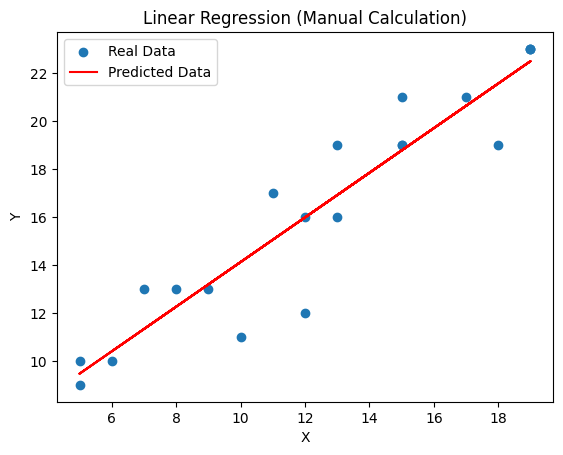

In [31]:
plt.scatter(df["x"], df["y"], label="Real Data")
plt.plot(df["x"], df["predicted_y_manual"], color="red", label="Predicted Data")
plt.title("Linear Regression (Manual Calculation)")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

### NORMAL EQUATION

[4.75946074 0.93472091]
predicted_y_normal = 4.759460737937539 + 0.9347209082308429 * x
Root Mean Squared Error: 1.599191937623049


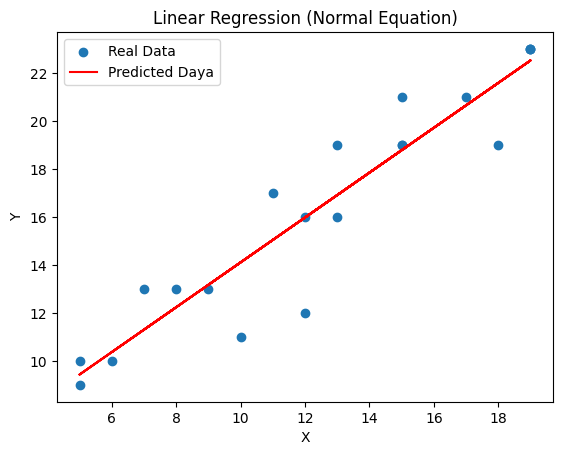

In [32]:
# Adding x0=1 to each instance
list_x_new = np.array([np.ones(len(x_arr)), x_arr.flatten()]).T

# Using Normal Equation.
theta_best_values = np.linalg.inv(list_x_new.T.dot(list_x_new)).dot(list_x_new.T).dot(y_arr)

# Display best values obtained.
print(theta_best_values)
inter_normal = theta_best_values[0]
coef_normal = theta_best_values[1]

print(f"predicted_y_normal = {inter_normal} + {coef_normal} * x")
predicted_y_normal = inter_normal + coef_normal * x_arr

mse_normal = (1/len(x_arr)) * sum((y_arr - predicted_y_normal)**2)
rmse_normal = np.sqrt(mse_normal)
print(f"Root Mean Squared Error: {rmse_normal}")

plt.scatter(x_arr, y_arr, label="Real Data")
plt.plot(x_arr, predicted_y_normal, color="red", label="Predicted Daya")
plt.title("Linear Regression (Normal Equation)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

result_normal = inter_normal, coef_normal, rmse_normal
result_normal_df = pd.DataFrame(result_normal, index=("Intercept", "Coefficient", "Root Mean Squared Error"))
result_normal_df = result_normal_df.rename({0: "Normal Equation"}, axis=1)

result_normal_df.to_csv("results/result_normal.csv", encoding="utf-8")



### SKLEARN

In [33]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#creating LinearRegression Object
lm = LinearRegression()

In [34]:
lm.fit(df[["x"]], df["y"])

LinearRegression()

In [35]:
print("Intercept:", lm.intercept_)
print("Coefficient:", lm.coef_)

print(f"predicted_y_sklearn = {lm.intercept_} + {lm.coef_[0]} * x")
predicted_y_sklearn = lm.intercept_ + lm.coef_ * x_arr
predicted_y_sklearn

mse_sklearn = metrics.mean_squared_error(y_arr, predicted_y_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
print(f"Root Mean Squared Error: {rmse_sklearn}")

Intercept: 4.759460737937562
Coefficient: [0.93472091]
predicted_y_sklearn = 4.759460737937562 + 0.9347209082308419 * x
Root Mean Squared Error: 1.599191937623049


In [36]:
result_sklearn = (lm.intercept_, lm.coef_[0], rmse_sklearn)
result_sklearn_df = pd.DataFrame(result_sklearn, index=("Intercept", "Coefficient", "Root Mean Squared Error"))
result_sklearn_df = result_sklearn_df.rename({0: "SKLearn"}, axis=1)
result_sklearn_df.to_csv("results/result_sklearn.csv", encoding="utf-8")

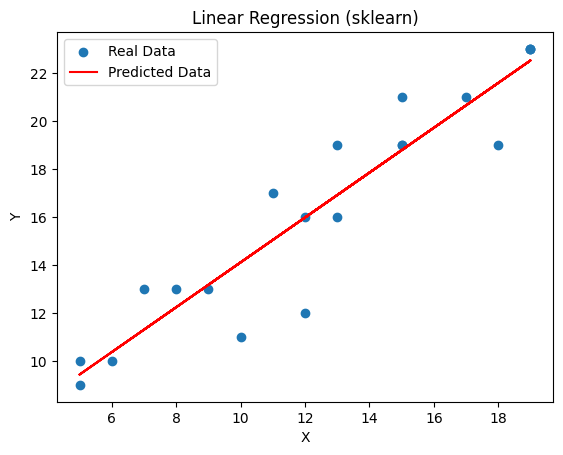

In [37]:
plt.scatter(x_arr, y_arr, label="Real Data")
plt.plot(x_arr, predicted_y_sklearn, color="red", label="Predicted Data")
plt.title("Linear Regression (sklearn)")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

### GRADIENT DESCENT

#### Gradient Descent - Animated Graph

Let's try with 100 iterations only and save the graph for each iteration

Intercept: 0.0985311455520499, Coefficient: 1.229888804550516
predicted_y_gd = 0.0985311455520499 + 1.229888804550516 * x
Root Mean Squared Error: 2.3275316066656404


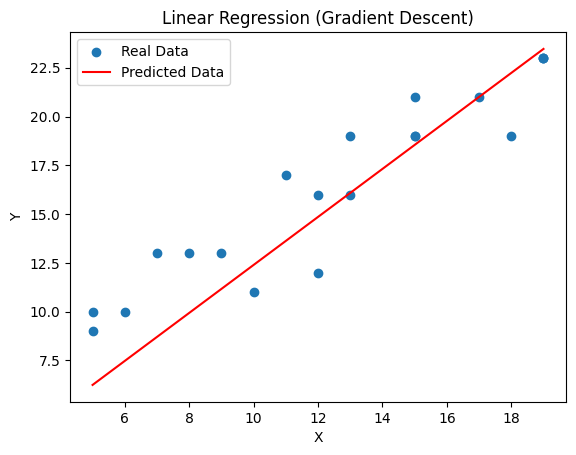

In [39]:
inter_gd = 0
coef_gd = 0

iterations = 100
learning_rate = 0.0001

n = len(x_arr)

thetas = [] # save all the intercepts and coefficients for each iteration
pred_y_list = [] # save all the predicted y for each iteration
mse_list = [] # save all the MSEs for each iteration
rmse_list = [] # save all the RMSEs for each iteration

for i in range(iterations):
	predicted_y_gd = inter_gd + coef_gd * x_arr
	pred_y_list.append(predicted_y_gd)
	derivative_intercept = (-2/n) * sum(y_arr - predicted_y_gd)
	derivative_coefficient = (-2/n) * sum(x_arr * (y_arr - predicted_y_gd))
	inter_gd = inter_gd - learning_rate * derivative_intercept
	coef_gd = coef_gd - learning_rate * derivative_coefficient
	thetas.append([inter_gd, coef_gd])
	mse_gd = (1/n) * sum((y_arr - predicted_y_gd)**2)
	mse_list.append(mse_gd)
	rmse_gd = np.sqrt(mse_gd)
	rmse_list.append(rmse_gd)


print(f"Intercept: {inter_gd}, Coefficient: {coef_gd}")
print(f"predicted_y_gd = {inter_gd} + {coef_gd} * x")
predicted_y_gd = inter_gd + coef_gd * x_arr
print("Root Mean Squared Error:", rmse_gd)

plt.scatter(x_arr, y_arr, label="Real Data")
plt.plot([min(x_arr), max(x_arr)], [min(predicted_y_gd), max(predicted_y_gd)], color="red", label="Predicted Data")
plt.title("Linear Regression (Gradient Descent)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [40]:
for idx, pred_y in enumerate(pred_y_list):
    fig, ax = plt.subplots()
    ax.scatter(x_arr, y_arr, label="Real Data")
    ax.plot(x_arr, pred_y, color="red", label="Predicted Data")
    ax.set_title("Linear Regression (Gradient Descent)")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

    # Add text box with MSE value
    rmse_str = "RMSE = {:.4f}".format(rmse_list[idx])
    ax.text(0.05, 0.80, rmse_str, transform=ax.transAxes, fontsize=10,
             verticalalignment='top')

    fig_name = "images/fig_" + str(idx) + ".png"
    plt.savefig(fig_name)
    plt.close(fig) # optionally, close the figure to free up memory

Combine all the graphs and convert them into an animated gif

In [41]:
import glob
from PIL import Image

def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    frame_one.save("Gradient Descent_Animation.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    
if __name__ == "__main__":
    make_gif("images")

Open the animated gif


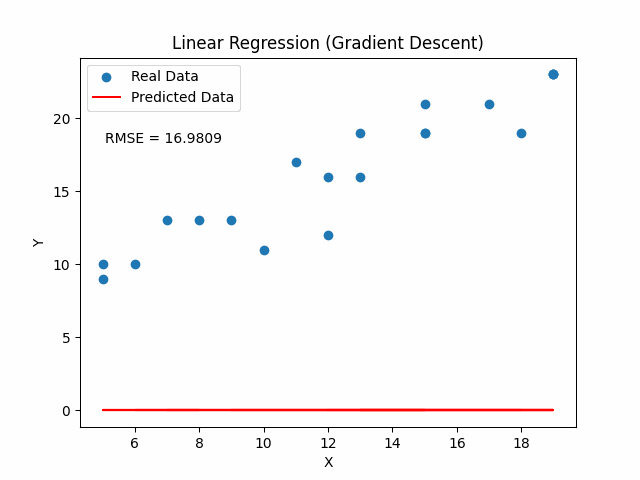

In [42]:
import io
import base64
from IPython.display import HTML

filename = "Gradient Descent_Animation.gif"

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### Let's find the minimum MSE

Intercept: 4.759460737770814, Coefficient: 0.934720908242672
predicted_y_gd = 4.759460737770814 + 0.934720908242672 * x
Root Mean Squared Error: 1.599191937623049


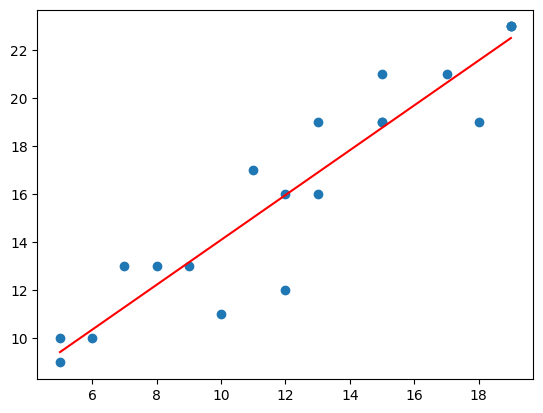

In [45]:
inter_gd = 0
coef_gd = 0

iterations = 100000
learning_rate = 0.001

n = len(x_arr)

thetas = [] # save all the intercepts and coefficients for each iteration
pred_y_list = [] # save all the predicted y for each iteration
mse_list = [] # save all the MSEs for each iteration
rmse_list = [] # save all the RMSEs for each iteration

for i in range(iterations):
    predicted_y_gd = inter_gd + coef_gd * x_arr
    pred_y_list.append(predicted_y_gd)
    derivative_intercept = (-2/n) * sum(y_arr - predicted_y_gd)
    derivative_coefficient = (-2/n) * sum(x_arr * (y_arr - predicted_y_gd))
    inter_gd = inter_gd - learning_rate * derivative_intercept
    coef_gd = coef_gd - learning_rate * derivative_coefficient
    thetas.append([inter_gd, coef_gd])
    mse_gd = (1/n) * sum((y_arr - predicted_y_gd)**2)
    mse_list.append(mse_gd)
    rmse_gd = np.sqrt(mse_gd)
    rmse_list.append(rmse_gd)

print(f"Intercept: {inter_gd}, Coefficient: {coef_gd}")
print(f"predicted_y_gd = {inter_gd} + {coef_gd} * x")
predicted_y_gd = inter_gd + coef_gd * x_arr
print("Root Mean Squared Error:", rmse_gd)

plt.scatter(x_arr, y_arr)
plt.plot([min(x_arr), max(x_arr)], [min(predicted_y_gd), max(predicted_y_gd)], color="red")

result_gd = inter_gd, coef_gd, rmse_gd
result_gd_df = pd.DataFrame(result_gd, index=("Intercept", "Coefficient", "Root Mean Squared Error"))
result_gd_df = result_gd_df.rename({0: "Gradient Descent"}, axis=1)

result_gd_df.to_csv("results/result_gd.csv", encoding="utf-8")

To get the minimum MSE, we need to iterate more. I tried the following parameters:
- iterations = 100000
- learning_rate = 0.001

It gave me the same result as the ones of Manual Calculation, Normal Equation and Sklearn.

### Compare all the models

In [46]:
result_manual = pd.read_csv("results/result_manual.csv")
result_normal = pd.read_csv("results/result_normal.csv")
result_sklearn = pd.read_csv("results/result_sklearn.csv")
result_gd = pd.read_csv("results/result_gd.csv")


comparison = pd.merge(result_manual, result_normal, on="Unnamed: 0", how="left")
comparison = pd.merge(comparison, result_sklearn, on="Unnamed: 0", how="left")
comparison = pd.merge(comparison, result_gd, on="Unnamed: 0", how="left")
comparison = comparison.rename({"Unnamed: 0": "Result"}, axis=1)
comparison

,Result,Manual Calculation,Normal Equation,SKLearn,Gradient Descent
0,Intercept,4.82000,4.759461,4.759461,4.759461
1,Coefficient,0.93000,0.934721,0.934721,0.934721
2,Root Mean Squared Error,1.59934,1.599192,1.599192,1.599192


In [47]:
df["predicted_y_normal"] = predicted_y_normal
df["predicted_y_sklearn"] = predicted_y_sklearn
df["predicted_y_gd"] = predicted_y_gd
df

C:\Users\Selvie\AppData\Local\Temp\ipykernel_4064\4213732162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["predicted_y_normal"] = predicted_y_normal
C:\Users\Selvie\AppData\Local\Temp\ipykernel_4064\4213732162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["predicted_y_sklearn"] = predicted_y_sklearn
C:\Users\Selvie\AppData\Local\Temp\ipykernel_4064\4213732162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,x,y,predicted_y_manual,predicted_y_normal,predicted_y_sklearn,predicted_y_gd
0,5,10,9.47,9.433065,9.433065,9.433065
1,19,23,22.49,22.519158,22.519158,22.519158
2,17,21,20.63,20.649716,20.649716,20.649716
3,13,19,16.91,16.910833,16.910833,16.910833
4,19,23,22.49,22.519158,22.519158,22.519158
5,15,21,18.77,18.780274,18.780274,18.780274
6,15,19,18.77,18.780274,18.780274,18.780274
7,7,13,11.33,11.302507,11.302507,11.302507
8,8,13,12.26,12.237228,12.237228,12.237228
9,6,10,10.40,10.367786,10.367786,10.367786


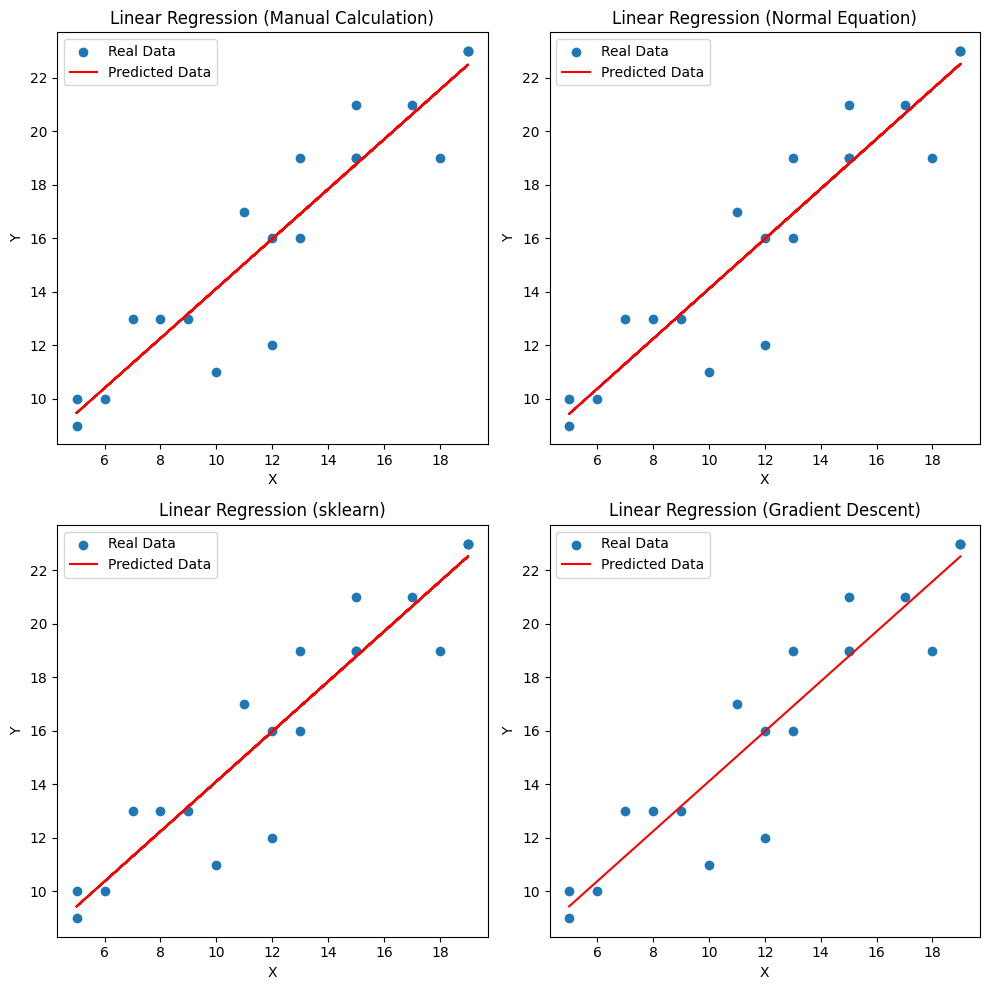

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Manual Calculation Plot
axs[0, 0].scatter(df["x"], df["y"], label="Real Data")
axs[0, 0].plot(df["x"], df["predicted_y_manual"], color="red", label="Predicted Data")
axs[0, 0].set_title("Linear Regression (Manual Calculation)")
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')
axs[0, 0].legend()

# Normal Equation Plot
axs[0, 1].scatter(x_arr, y_arr, label="Real Data")
axs[0, 1].plot(x_arr, predicted_y_normal, color="red", label="Predicted Data")
axs[0, 1].set_title("Linear Regression (Normal Equation)")
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
axs[0, 1].legend()

# SKLearn Plot
axs[1, 0].scatter(x_arr, y_arr, label="Real Data")
axs[1, 0].plot(x_arr, predicted_y_sklearn, color="red", label="Predicted Data")
axs[1, 0].set_title("Linear Regression (sklearn)")
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')
axs[1, 0].legend()

# GD Plot
axs[1, 1].scatter(x_arr, y_arr, label="Real Data")
axs[1, 1].plot([min(x_arr), max(x_arr)], [min(predicted_y_gd), max(predicted_y_gd)], color="red", label="Predicted Data")
axs[1, 1].set_title("Linear Regression (Gradient Descent)")
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

### Let's try with other data

In [65]:
raw_data = pd.read_csv("data/CarPrice_Assignment.csv", encoding="utf-8")
raw_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [66]:
raw_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

C:\Users\Selvie\AppData\Local\Temp\ipykernel_4064\77875352.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(),


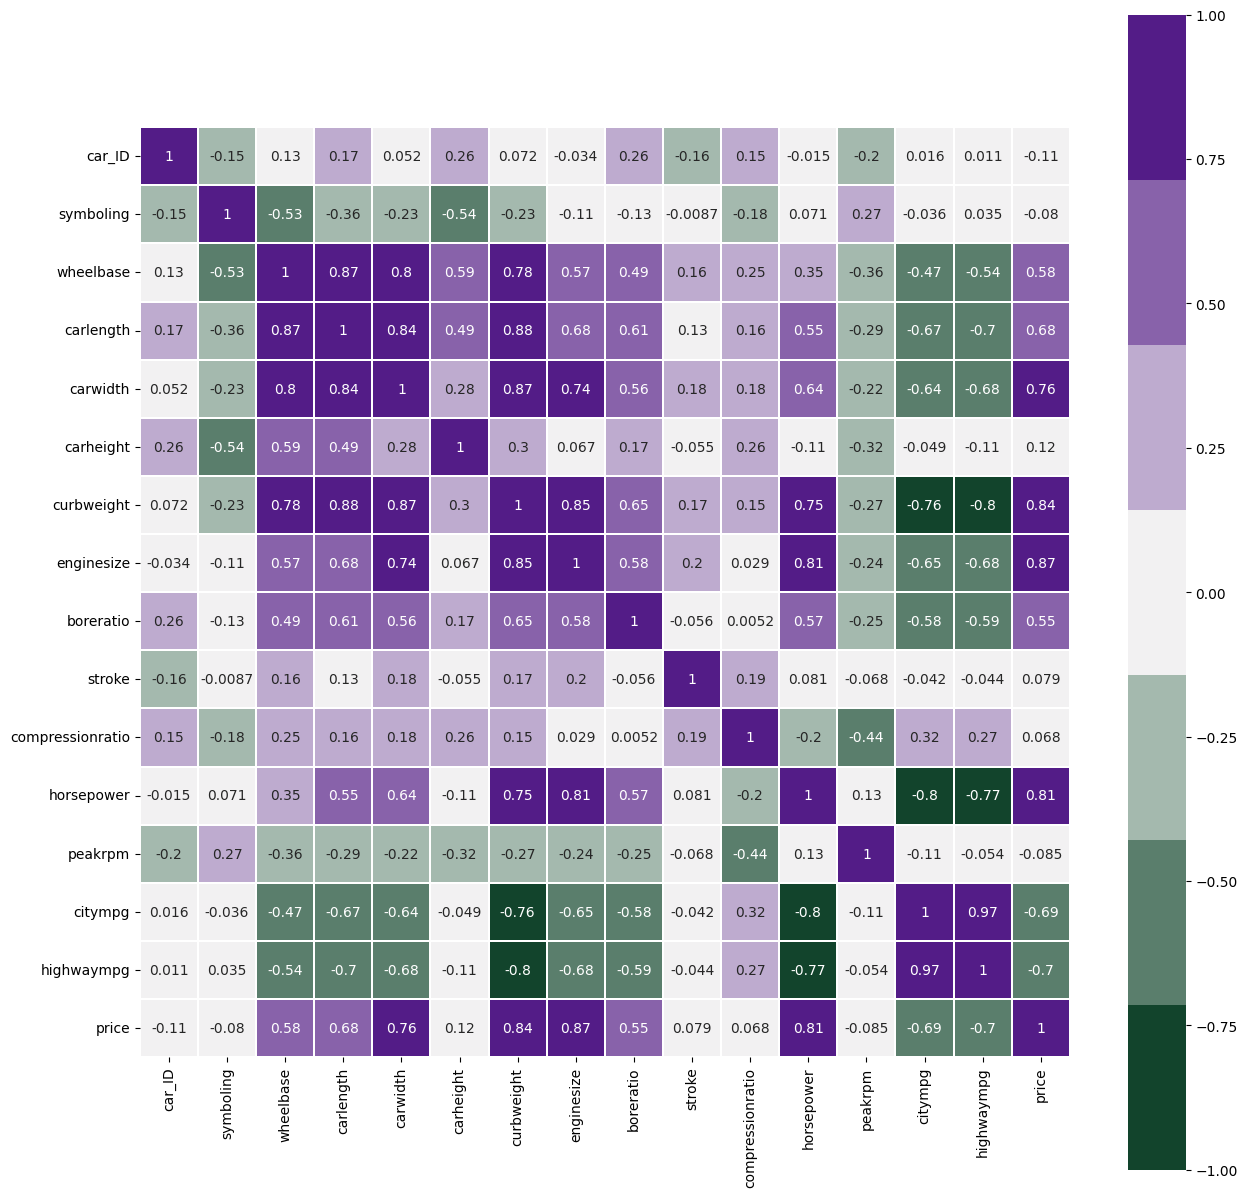

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(raw_data.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

There is a high correlation between "enginesize" and "price". Let's check the relationship of both variables through a scatter plot.

Text(0.5, 1.0, 'Relationship between Price and Engine Size')

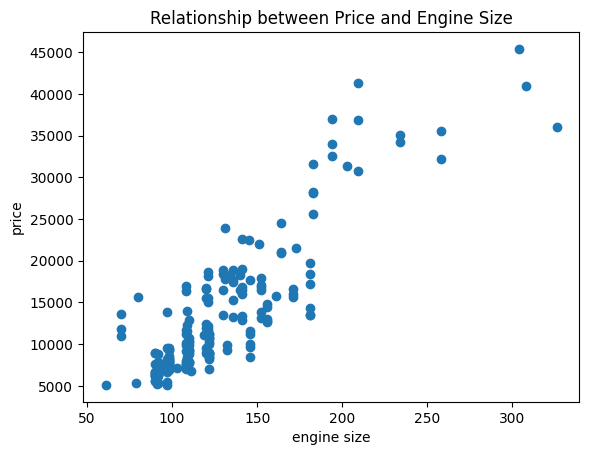

In [68]:
plt.scatter(raw_data["enginesize"], raw_data["price"])
plt.xlabel("engine size")
plt.ylabel("price")
plt.title("Relationship between Price and Engine Size")

### Since the the graph shows a linear regression. Let's just plot this data into our models. I am going to skip the manual calculation coz it is too long :)

Scale the data first because both variables have different scale. Save the scaled data in CSVs.

In [69]:
import functions.scale_data as sd

sd.scale_data(raw_data["enginesize"], "data/scaled_x.csv")
sd.scale_data(raw_data["price"], "data/scaled_y.csv")

Open the CSVs and convert the scaled data into Numpy array

In [70]:
scaled_x = pd.read_csv("data/scaled_x.csv")
scaled_x = np.array(scaled_x["Scaled Data"])
scaled_y = pd.read_csv("data/scaled_y.csv")
scaled_y = np.array(scaled_y["Scaled Data"])

### NORMAL EQUATION

Plot the scaled data into the Normal Equation function

[1.83461084e-16 8.74144803e-01]
predicted_y_normal = 1.8346108409843858e-16 + 0.8741448025245113 * x
Root Mean Squared Error: 0.4856653829741033


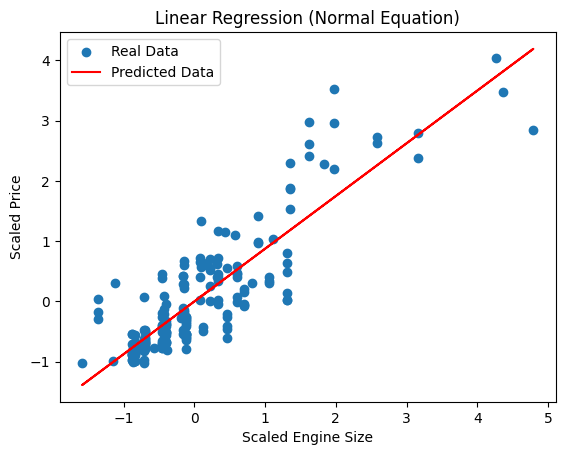

In [71]:
import functions.linear_normal as linor

linor.calculate_lm_normal_equation(x=scaled_x, y=scaled_y, x_label="Scaled Engine Size", y_label="Scaled Price", path="data")

### SKLEARN

Plot the scaled data into the built-in SKLearn function. In this case, I am NOT going to split the data into train and test.

In [72]:
scaled_x_df = pd.DataFrame(scaled_x)
scaled_x_df.head()

,0
0,0.074449
1,0.074449
2,0.604046
3,-0.431076
4,0.218885


In [73]:
scaled_y_series = pd.Series(scaled_y)
scaled_y_series.head()

0    0.027391
1    0.404461
2    0.404461
3    0.084485
4    0.523668
dtype: float64

Intercept: 1.6142556982074521e-16
Coefficient: [0.8741448]
predicted_y_sklearn = 1.6142556982074521e-16 + 0.874144802524512 * x
Root Mean Squared Error: 0.4856653829741032


Text(0, 0.5, 'Scaled Price')

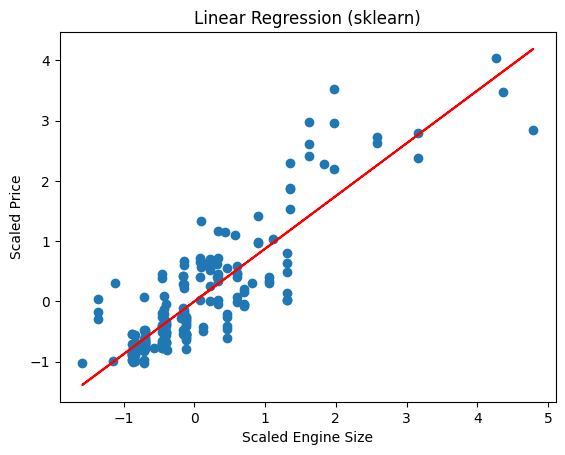

In [74]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#creating LinearRegression Object
lm = LinearRegression()

lm.fit(scaled_x_df, scaled_y_series)

print("Intercept:", lm.intercept_)
print("Coefficient:", lm.coef_)

print(f"predicted_y_sklearn = {lm.intercept_} + {lm.coef_[0]} * x")
predicted_y_sklearn = lm.intercept_ + lm.coef_ * scaled_x_df

mse_sklearn = metrics.mean_squared_error(scaled_y_series, predicted_y_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
print(f"Root Mean Squared Error: {rmse_sklearn}")

result_sklearn = (lm.intercept_, lm.coef_[0], rmse_sklearn)
result_sklearn_df = pd.DataFrame(result_sklearn, index=("Intercept", "Coefficient", "Root Mean Squared Error"))
result_sklearn_df = result_sklearn_df.rename({0: "SKLearn"}, axis=1)
result_sklearn_df.to_csv("data/result_sklearn.csv", encoding="utf-8")


plt.scatter(scaled_x_df, scaled_y_series)
plt.plot(scaled_x_df, predicted_y_sklearn, color="red")
plt.title("Linear Regression (sklearn)")
plt.xlabel("Scaled Engine Size")
plt.ylabel("Scaled Price")

### GRADIENT DESCENT

Intercept: 1.6644030327414613e-16, Coefficient: 0.8741448007584898
predicted_y_gd = 1.6644030327414613e-16 + 0.8741448007584898 * x
Root Mean Squared Error: 0.48566538297410333


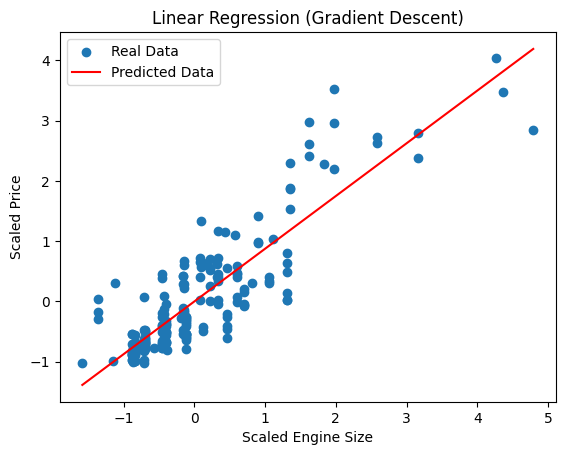

In [75]:
import functions.linear_gd as lingd

lingd.calculate_lm_grad_desc(scaled_x, scaled_y, iterations=10000, learning_rate=0.001, 
                             x_label="Scaled Engine Size", y_label="Scaled Price", path="data")

### Compare all the models

In [61]:
result_normal = pd.read_csv("data/result_normal.csv")
result_sklearn = pd.read_csv("data/result_sklearn.csv")
result_gd = pd.read_csv("data/result_gd.csv")

In [62]:
comparison = pd.merge(result_normal, result_sklearn, on="Unnamed: 0", how="left")
comparison = pd.merge(comparison, result_gd, on="Unnamed: 0", how="left")
comparison = comparison.rename({"Unnamed: 0": "Result"}, axis=1)
comparison

,Result,Normal Equation,SKLearn,Gradient Descent
0,Intercept,1.834611e-16,1.614256e-16,1.664403e-16
1,Coefficient,8.741448e-01,8.741448e-01,8.741448e-01
2,Root Mean Squared Error,4.856654e-01,4.856654e-01,4.856654e-01


The results of the three models are the same. The data is still in the scaled condition. It is supposed to be unscaled later on.